# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='/Users/vkammath/Downloads/Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
print('brain:', brain_name)

brain: ReacherBrain


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the Agent

In [9]:
from collections import deque
from agents import DDPGAgent
import matplotlib.pyplot as plt
import time
import torch
%matplotlib inline

def ddpg(n_episodes=1000, max_t=1000):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=100) # Store the last 100 scores, used to compute mean and determine if the env is solved.
    score = 0 # Scores for every agent in an episode.
    scores_episodes = [] # maintain progressive scores for all episodes for plotting.
    
    agent = DDPGAgent(state_size, action_size, random_seed=0)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        
        agent.reset()
            
        score = 0
            
        for t in range(max_t):
            action = agent.act(state)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]    # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]        
            
            agent.step(state, action, reward, next_state, done) 
 
            state = next_state
            score += reward
            if (t % 50==0):
                print('\rTimestep {}\tScore: {:.2f}'.format(t, score), end="") 
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores_episodes.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tWindowed Average Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\ttWindowed Average Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="\n")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_episodes



Episode 1	Score: 0.61	Windowed Average Score: 0.61
Episode 2	Score: 1.24	Windowed Average Score: 0.92
Episode 3	Score: 0.65	Windowed Average Score: 0.83
Episode 4	Score: 0.42	Windowed Average Score: 0.73
Episode 5	Score: 0.87	Windowed Average Score: 0.76
Episode 6	Score: 0.49	Windowed Average Score: 0.71
Episode 7	Score: 1.77	Windowed Average Score: 0.86
Episode 8	Score: 0.73	Windowed Average Score: 0.85
Episode 9	Score: 1.07	Windowed Average Score: 0.87
Episode 10	Score: 1.03	Windowed Average Score: 0.89
Episode 11	Score: 1.05	Windowed Average Score: 0.90
Episode 12	Score: 1.65	Windowed Average Score: 0.96
Episode 13	Score: 0.85	Windowed Average Score: 0.96
Episode 14	Score: 1.38	Windowed Average Score: 0.99
Episode 15	Score: 0.23	Windowed Average Score: 0.94
Episode 16	Score: 2.46	Windowed Average Score: 1.03
Episode 17	Score: 1.09	Windowed Average Score: 1.03
Episode 18	Score: 1.76	Windowed Average Score: 1.07
Episode 19	Score: 1.32	Windowed Average Score: 1.09
Episode 20	Score: 1.4

Episode 157	Score: 22.02	Windowed Average Score: 8.77
Episode 158	Score: 20.26	Windowed Average Score: 8.96
Episode 159	Score: 21.60	Windowed Average Score: 9.15
Episode 160	Score: 12.75	Windowed Average Score: 9.20
Episode 161	Score: 21.18	Windowed Average Score: 9.36
Episode 162	Score: 31.11	Windowed Average Score: 9.65
Episode 163	Score: 22.25	Windowed Average Score: 9.83
Episode 164	Score: 13.14	Windowed Average Score: 9.92
Episode 165	Score: 32.46	Windowed Average Score: 10.22
Episode 166	Score: 29.35	Windowed Average Score: 10.46
Episode 167	Score: 14.52	Windowed Average Score: 10.55
Episode 168	Score: 17.96	Windowed Average Score: 10.70
Episode 169	Score: 20.71	Windowed Average Score: 10.87
Episode 170	Score: 16.17	Windowed Average Score: 10.99
Episode 171	Score: 23.79	Windowed Average Score: 11.20
Episode 172	Score: 25.94	Windowed Average Score: 11.41
Episode 173	Score: 35.09	Windowed Average Score: 11.68
Episode 174	Score: 26.81	Windowed Average Score: 11.93
Episode 175	Score:

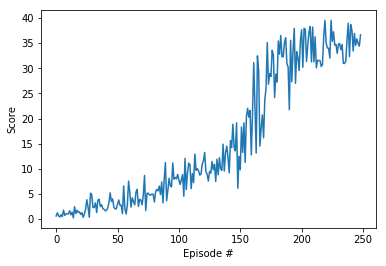

In [10]:
scores = ddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()